## Análisis de datos - Clase 4

### Codificación (encoding)

Técnicas de codificación:
- One-Hot encoding
- Label encoding
- Ordinal Encoding
- Target Encoding (Mean encoding)
- Frequency Encoding
- Hashing Encoding
- Cyclic Encoding


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders import TargetEncoder, HashingEncoder

from sklearn.model_selection import train_test_split

In [2]:
# Cargamos el dataset de Titanic de Seaborn
titanic = sns.load_dataset("titanic")[["sex", "class", "embark_town", "age", "fare", "survived", "alive"]].dropna()

# split 80%/20% (sin target definido)
df, test_df = train_test_split(titanic, test_size=0.2, random_state=42)

print(df.shape, test_df.shape)

(569, 7) (143, 7)


In [3]:
df.head()

,sex,class,embark_town,age,fare,survived,alive
472,female,Second,Southampton,33.0,27.7500,1,yes
432,female,Second,Southampton,42.0,26.0000,1,yes
666,male,Second,Southampton,25.0,13.0000,0,no
30,male,First,Cherbourg,40.0,27.7208,0,no
291,female,First,Cherbourg,19.0,91.0792,1,yes


#### One-Hot encoding
Crea una columna binaria (0/1) para cada categoría.

**Opción 1: con dummies de Pandas**

In [4]:
# 1. One-Hot Encoding
one_hot = pd.get_dummies(df["sex"], prefix="sex")
df_one_hot = df.join(one_hot) #.drop(columns=["sex"])
df_one_hot.head(10)

,sex,class,embark_town,age,fare,survived,alive,sex_female,sex_male
472,female,Second,Southampton,33.0,27.7500,1,yes,True,False
432,female,Second,Southampton,42.0,26.0000,1,yes,True,False
666,male,Second,Southampton,25.0,13.0000,0,no,False,True
30,male,First,Cherbourg,40.0,27.7208,0,no,False,True
291,female,First,Cherbourg,19.0,91.0792,1,yes,True,False
865,female,Second,Southampton,42.0,13.0000,1,yes,True,False
308,male,Second,Cherbourg,30.0,24.0000,0,no,False,True
370,male,First,Cherbourg,25.0,55.4417,1,yes,False,True
835,female,First,Cherbourg,39.0,83.1583,1,yes,True,False
139,male,First,Cherbourg,24.0,79.2000,0,no,False,True


**Opción 2: con OneHotEncoder de Scikit-learn**

In [5]:
# Inicializar el OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)  

# Fit + transform
encoded_array = ohe.fit_transform(df[["sex"]])  # Ojo! me devuelve un array de NumPy
columns=ohe.get_feature_names_out(["sex"])

# Creo un DF a partir del array
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(["sex"]))

# Lo juntamos con el df original (en este caso no eliminamos la columna original a modo demostrativo)
df_ohe = df.join(encoded_df)  # opcional: .drop(columns=["sex"])

df_ohe.head(10)


,sex,class,embark_town,age,fare,survived,alive,sex_female,sex_male
472,female,Second,Southampton,33.0,27.7500,1,yes,0.0,1.0
432,female,Second,Southampton,42.0,26.0000,1,yes,0.0,1.0
666,male,Second,Southampton,25.0,13.0000,0,no,NaN,NaN
30,male,First,Cherbourg,40.0,27.7208,0,no,1.0,0.0
291,female,First,Cherbourg,19.0,91.0792,1,yes,0.0,1.0
865,female,Second,Southampton,42.0,13.0000,1,yes,NaN,NaN
308,male,Second,Cherbourg,30.0,24.0000,0,no,1.0,0.0
370,male,First,Cherbourg,25.0,55.4417,1,yes,1.0,0.0
835,female,First,Cherbourg,39.0,83.1583,1,yes,NaN,NaN
139,male,First,Cherbourg,24.0,79.2000,0,no,1.0,0.0


#### Label encoding

Asigna un número entero arbitrario a cada categoría (de la variable target).

In [6]:
le = LabelEncoder()

# Suponemos que nuestra variable target es "alive"
df['alive_encoded'] = le.fit_transform(df['alive'])

# Resultados
print("Catergorías en embark_town:", le.classes_)

print(df.groupby(['alive', 'alive_encoded']).size())


Catergorías en embark_town: ['no' 'yes']
alive  alive_encoded
no     0                344
yes    1                225
dtype: int64


 Nota: observar que el Label encoder de Scikit learn asigna los números en orden alfabético.

#### Ordinal Encoding
Asigna un número entero secuencial a cada categoría.

In [7]:
# 2. Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[["Third", "Second", "First"]])
df["class_encoded"] = ordinal_encoder.fit_transform(df[["class"]]).astype(int)
df.head(10)

,sex,class,embark_town,age,fare,survived,alive,alive_encoded,class_encoded
472,female,Second,Southampton,33.0,27.7500,1,yes,1,1
432,female,Second,Southampton,42.0,26.0000,1,yes,1,1
666,male,Second,Southampton,25.0,13.0000,0,no,0,1
30,male,First,Cherbourg,40.0,27.7208,0,no,0,2
291,female,First,Cherbourg,19.0,91.0792,1,yes,1,2
865,female,Second,Southampton,42.0,13.0000,1,yes,1,1
308,male,Second,Cherbourg,30.0,24.0000,0,no,0,1
370,male,First,Cherbourg,25.0,55.4417,1,yes,1,2
835,female,First,Cherbourg,39.0,83.1583,1,yes,1,2
139,male,First,Cherbourg,24.0,79.2000,0,no,0,2


#### Target Encoding (Mean encoding)

Reemplaza cada categoría con la media (u otra estadística) de la variable objetivo.

Hace un ajuste en función de la relación entre ambas variables (la que estoy codificando y la variable objetivo).


In [8]:
# 3. Target Encoding

target_encoder = TargetEncoder()
df["embark_town_encoded"] = target_encoder.fit_transform(df["embark_town"], df["survived"])
df.head(10)

,sex,class,embark_town,age,fare,survived,alive,alive_encoded,class_encoded,embark_town_encoded
472,female,Second,Southampton,33.0,27.7500,1,yes,1,1,0.357616
432,female,Second,Southampton,42.0,26.0000,1,yes,1,1,0.357616
666,male,Second,Southampton,25.0,13.0000,0,no,0,1,0.357616
30,male,First,Cherbourg,40.0,27.7208,0,no,0,2,0.581556
291,female,First,Cherbourg,19.0,91.0792,1,yes,1,2,0.581556
865,female,Second,Southampton,42.0,13.0000,1,yes,1,1,0.357616
308,male,Second,Cherbourg,30.0,24.0000,0,no,0,1,0.581556
370,male,First,Cherbourg,25.0,55.4417,1,yes,1,2,0.581556
835,female,First,Cherbourg,39.0,83.1583,1,yes,1,2,0.581556
139,male,First,Cherbourg,24.0,79.2000,0,no,0,2,0.581556


#### Frequency Encoding
Sustituye cada categoría por su frecuencia de aparición.

In [9]:
# 4. Frequency Encoding
freq_encoding = df["embark_town"].value_counts(normalize=True)
df["embark_town_freq"] = df["embark_town"].map(freq_encoding)
df.head(10)

,sex,class,embark_town,age,fare,survived,alive,alive_encoded,class_encoded,embark_town_encoded,embark_town_freq
472,female,Second,Southampton,33.0,27.7500,1,yes,1,1,0.357616,0.796134
432,female,Second,Southampton,42.0,26.0000,1,yes,1,1,0.357616,0.796134
666,male,Second,Southampton,25.0,13.0000,0,no,0,1,0.357616,0.796134
30,male,First,Cherbourg,40.0,27.7208,0,no,0,2,0.581556,0.172232
291,female,First,Cherbourg,19.0,91.0792,1,yes,1,2,0.581556,0.172232
865,female,Second,Southampton,42.0,13.0000,1,yes,1,1,0.357616,0.796134
308,male,Second,Cherbourg,30.0,24.0000,0,no,0,1,0.581556,0.172232
370,male,First,Cherbourg,25.0,55.4417,1,yes,1,2,0.581556,0.172232
835,female,First,Cherbourg,39.0,83.1583,1,yes,1,2,0.581556,0.172232
139,male,First,Cherbourg,24.0,79.2000,0,no,0,2,0.581556,0.172232


#### Hashing Encoding
Aplica una función hash para mapear categorías en un número fijo de dimensiones.

In [10]:
# 5. Hashing Encoding
hashing_encoder = HashingEncoder(n_components=4) 
# Nota: n_components es el nro de columnas a generar. Si hay más, hay menos riesgo de colisión 
# pero mayor dimensionalidad.

hash_encoded = hashing_encoder.fit_transform(df[["embark_town"]])
df = df.join(hash_encoded)
df.head()

,sex,class,embark_town,age,fare,survived,alive,alive_encoded,class_encoded,embark_town_encoded,embark_town_freq,col_0,col_1,col_2,col_3
472,female,Second,Southampton,33.0,27.7500,1,yes,1,1,0.357616,0.796134,0,0,1,0
432,female,Second,Southampton,42.0,26.0000,1,yes,1,1,0.357616,0.796134,0,0,1,0
666,male,Second,Southampton,25.0,13.0000,0,no,0,1,0.357616,0.796134,0,0,1,0
30,male,First,Cherbourg,40.0,27.7208,0,no,0,2,0.581556,0.172232,0,0,0,1
291,female,First,Cherbourg,19.0,91.0792,1,yes,1,2,0.581556,0.172232,0,0,0,1


#### Cyclic Encoding
Transforma variables cíclicas (como horas del día o meses del año) en coordenadas en un círculo.

In [11]:
# Cargamos el dataset de vuelos (Flights)

flights_df = sns.load_dataset("flights")
flights_df["month_num"] = flights_df["month"].map({
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}).astype(int)

flights_df["date"] = pd.to_datetime(flights_df["year"].astype(str) + '-' + flights_df["month_num"].astype(str), format='%Y-%m')
flights_df = flights_df.sort_values('date') # ya está ordenado, pero por las dudas ...

# Definimos un corte temporal y hacemos el split
flights_train = flights_df[flights_df['date'] < '1958-01-01'].copy()
flights_test = flights_df[flights_df['date'] >= '1958-01-01'].copy()

print(flights_train.shape, flights_test.shape)

(108, 5) (36, 5)


In [12]:
flights_train.head()

,year,month,passengers,month_num,date
0,1949,Jan,112,1,1949-01-01
1,1949,Feb,118,2,1949-02-01
2,1949,Mar,132,3,1949-03-01
3,1949,Apr,129,4,1949-04-01
4,1949,May,121,5,1949-05-01


In [13]:
# 6. Cyclic Encoding

flights_train["month_sin"] = np.sin(2 * np.pi * flights_train["month_num"] / 12)
flights_train["month_cos"] = np.cos(2 * np.pi * flights_train["month_num"] / 12)

pd.options.display.float_format = '{:.4f}'.format
flights_train.head(20)

,year,month,passengers,month_num,date,month_sin,month_cos
0,1949,Jan,112,1,1949-01-01,0.5000,0.8660
1,1949,Feb,118,2,1949-02-01,0.8660,0.5000
2,1949,Mar,132,3,1949-03-01,1.0000,0.0000
3,1949,Apr,129,4,1949-04-01,0.8660,-0.5000
4,1949,May,121,5,1949-05-01,0.5000,-0.8660
5,1949,Jun,135,6,1949-06-01,0.0000,-1.0000
6,1949,Jul,148,7,1949-07-01,-0.5000,-0.8660
7,1949,Aug,148,8,1949-08-01,-0.8660,-0.5000
8,1949,Sep,136,9,1949-09-01,-1.0000,-0.0000
9,1949,Oct,119,10,1949-10-01,-0.8660,0.5000


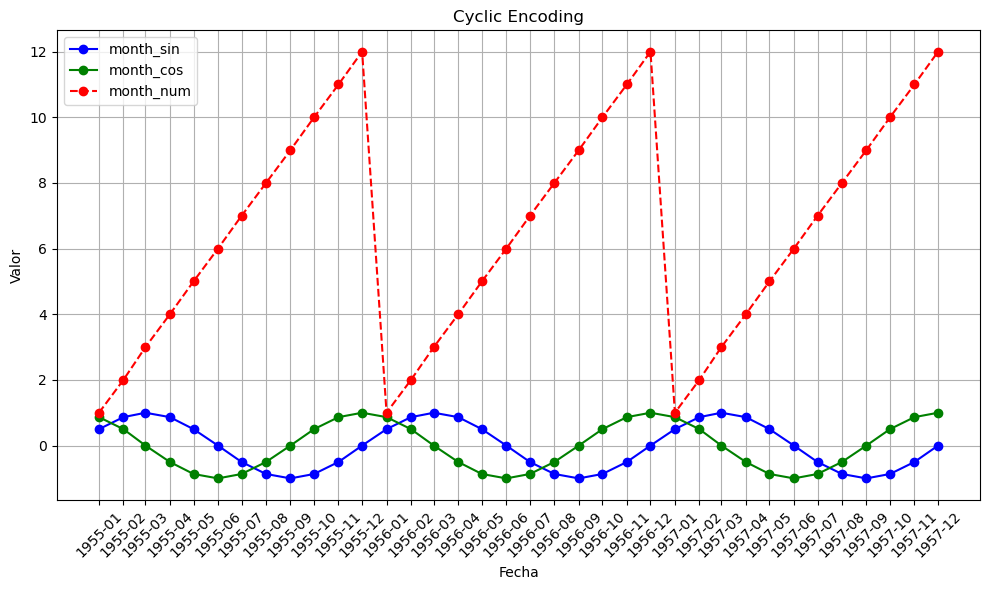

In [14]:
# Gráfico
df = flights_train[flights_train['year']>=1955]

plt.figure(figsize=(10, 6))
plt.plot(df["date"], df["month_sin"], label="month_sin", color='blue', marker='o')
plt.plot(df["date"], df["month_cos"], label="month_cos", color='green', marker='o')
plt.plot(df["date"], df["month_num"], label="month_num", color='red', linestyle='--', marker='o')

# Etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Cyclic Encoding")
plt.legend()

# Ajustar las fechas en el eje X para que se vean bien
plt.xticks(df["date"], df["date"].dt.strftime('%Y-%m'), rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()